In [36]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
from us import states

# Census API Key
from config import api_key
c = Census(api_key, year=2017)

In [37]:
# looking up catalogue
c.acs5.tables()

[{'name': 'B17015',
  'description': 'POVERTY STATUS IN THE PAST 12 MONTHS OF FAMILIES BY FAMILY TYPE BY SOCIAL SECURITY INCOME BY SUPPLEMENTAL SECURITY INCOME (SSI) AND CASH PUBLIC ASSISTANCE INCOME',
  'variables': 'https://api.census.gov/data/2017/acs/acs5/groups/B17015.json'},
 {'name': 'B18104',
  'description': 'SEX BY AGE BY COGNITIVE DIFFICULTY',
  'variables': 'https://api.census.gov/data/2017/acs/acs5/groups/B18104.json'},
 {'name': 'B17016',
  'description': 'POVERTY STATUS IN THE PAST 12 MONTHS OF FAMILIES BY FAMILY TYPE BY WORK EXPERIENCE OF HOUSEHOLDER AND SPOUSE',
  'variables': 'https://api.census.gov/data/2017/acs/acs5/groups/B17016.json'},
 {'name': 'B18105',
  'description': 'SEX BY AGE BY AMBULATORY DIFFICULTY',
  'variables': 'https://api.census.gov/data/2017/acs/acs5/groups/B18105.json'},
 {'name': 'B17017',
  'description': 'POVERTY STATUS IN THE PAST 12 MONTHS BY HOUSEHOLD TYPE BY AGE OF HOUSEHOLDER',
  'variables': 'https://api.census.gov/data/2017/acs/acs5/gro

In [38]:
# Grab relevant data, 25 and older , Bachelor's, Master's,Professional's, Doctor's, Total Population (25year & up)
census_data = c.acs5.get(('NAME','B15003_022E','B15003_023E' , 'B15003_024E', 'B15003_025E','B15003_001E' ), {'for': 'state:*'})

In [39]:
census_data

[{'NAME': 'Puerto Rico',
  'B15003_022E': 426310.0,
  'B15003_023E': 115565.0,
  'B15003_024E': 29241.0,
  'B15003_025E': 24653.0,
  'B15003_001E': 2390791.0,
  'state': '72'},
 {'NAME': 'Alabama',
  'B15003_022E': 503930.0,
  'B15003_023E': 216001.0,
  'B15003_024E': 49452.0,
  'B15003_025E': 34195.0,
  'B15003_001E': 3276637.0,
  'state': '01'},
 {'NAME': 'Alaska',
  'B15003_022E': 88308.0,
  'B15003_023E': 35770.0,
  'B15003_024E': 8878.0,
  'B15003_025E': 4865.0,
  'B15003_001E': 475442.0,
  'state': '02'},
 {'NAME': 'Arizona',
  'B15003_022E': 802435.0,
  'B15003_023E': 347309.0,
  'B15003_024E': 79689.0,
  'B15003_025E': 55224.0,
  'B15003_001E': 4516175.0,
  'state': '04'},
 {'NAME': 'Arkansas',
  'B15003_022E': 280677.0,
  'B15003_023E': 111094.0,
  'B15003_024E': 26156.0,
  'B15003_025E': 19501.0,
  'B15003_001E': 1985770.0,
  'state': '05'},
 {'NAME': 'California',
  'B15003_022E': 5291984.0,
  'B15003_023E': 2135376.0,
  'B15003_024E': 616368.0,
  'B15003_025E': 410003.0,
  

In [40]:
# Convert to DataFrame
census_pd = pd.DataFrame(census_data)


In [41]:
# Column Reordering / Renaming
census_pd = census_pd.rename(columns={"B15003_022E": "Bachelors",
                                      "B15003_023E": "Masters",
                                      "B15003_024E": "Professionals",
                                      "B15003_025E": "Doctors",
                                      "B15003_001E": "Total",
                                      "NAME": "Name", "state": "State"})

In [42]:
 # 25 years and older, bachelor's and above
print(census_pd)

                    Name  Bachelors    Masters  Professionals   Doctors  \
0            Puerto Rico   426310.0   115565.0        29241.0   24653.0   
1                Alabama   503930.0   216001.0        49452.0   34195.0   
2                 Alaska    88308.0    35770.0         8878.0    4865.0   
3                Arizona   802435.0   347309.0        79689.0   55224.0   
4               Arkansas   280677.0   111094.0        26156.0   19501.0   
5             California  5291984.0  2135376.0       616368.0  410003.0   
6               Colorado   909794.0   391994.0        83193.0   61492.0   
7            Connecticut   532055.0   306063.0        73239.0   41842.0   
8   District of Columbia   113830.0    96398.0        39862.0   20333.0   
9               Delaware   117478.0    60642.0        12303.0   11346.0   
10               Florida  2616384.0  1021907.0       295243.0  162324.0   
11               Georgia  1241995.0   539097.0       136781.0   85658.0   
12                Hawaii 

In [43]:
# Add in % Bachelor's Degree of population (Degree Count / Population)
census_pd["Bachelor's Percent"] = 100 * \
    census_pd["Bachelors"].astype(
        int) / census_pd["Total"].astype(int)

# Add in % Master's Degree of population (Degree Count / Population)
census_pd["Master's Percent"] = 100 * \
    census_pd["Masters"].astype(
        int) / census_pd["Total"].astype(int)

# Add in % Professional's Degree of population (Degree Count / Population)
census_pd["Professional's Percent"] = 100 * \
    census_pd["Professionals"].astype(
        int) / census_pd["Total"].astype(int)

# Add in % Doctor's Degree of population (Degree Count / Population)
census_pd["Doctor's Percent"] = 100 * \
    census_pd["Doctors"].astype(
        int) / census_pd["Total"].astype(int)

# Sum all %
census_pd['Percent Sum'] = census_pd["Bachelor's Percent"]+census_pd["Master's Percent"]+census_pd["Professional's Percent"]+census_pd["Doctor's Percent"]



In [44]:
print(census_pd)

                    Name  Bachelors    Masters  Professionals   Doctors  \
0            Puerto Rico   426310.0   115565.0        29241.0   24653.0   
1                Alabama   503930.0   216001.0        49452.0   34195.0   
2                 Alaska    88308.0    35770.0         8878.0    4865.0   
3                Arizona   802435.0   347309.0        79689.0   55224.0   
4               Arkansas   280677.0   111094.0        26156.0   19501.0   
5             California  5291984.0  2135376.0       616368.0  410003.0   
6               Colorado   909794.0   391994.0        83193.0   61492.0   
7            Connecticut   532055.0   306063.0        73239.0   41842.0   
8   District of Columbia   113830.0    96398.0        39862.0   20333.0   
9               Delaware   117478.0    60642.0        12303.0   11346.0   
10               Florida  2616384.0  1021907.0       295243.0  162324.0   
11               Georgia  1241995.0   539097.0       136781.0   85658.0   
12                Hawaii 

In [45]:
# Get less-educated data
census_pd['Percent Sum less educated'] = 100 - census_pd['Percent Sum']
census_pd

,Name,Bachelors,Masters,Professionals,Doctors,Total,State,Bachelor's Percent,Master's Percent,Professional's Percent,Doctor's Percent,Percent Sum,Percent Sum less educated
0,Puerto Rico,426310.0,115565.0,29241.0,24653.0,2390791.0,72,17.831337,4.833756,1.223068,1.031165,24.919326,75.080674
1,Alabama,503930.0,216001.0,49452.0,34195.0,3276637.0,01,15.379488,6.592155,1.509230,1.043600,24.524474,75.475526
2,Alaska,88308.0,35770.0,8878.0,4865.0,475442.0,02,18.573874,7.523525,1.867315,1.023258,28.987973,71.012027
3,Arizona,802435.0,347309.0,79689.0,55224.0,4516175.0,04,17.768023,7.690335,1.764524,1.222805,28.445687,71.554313
4,Arkansas,280677.0,111094.0,26156.0,19501.0,1985770.0,05,14.134416,5.594505,1.317172,0.982037,22.028130,77.971870
5,California,5291984.0,2135376.0,616368.0,410003.0,25950818.0,06,20.392359,8.228550,2.375139,1.579923,32.575971,67.424029
6,Colorado,909794.0,391994.0,83193.0,61492.0,3668477.0,08,24.800319,10.685470,2.267780,1.676227,39.429796,60.570204
7,Connecticut,532055.0,306063.0,73239.0,41842.0,2480297.0,09,21.451262,12.339772,2.952832,1.686975,38.430841,61.569159
8,District of Columbia,113830.0,96398.0,39862.0,20333.0,477843.0,11,23.821632,20.173572,8.342071,4.255163,56.592437,43.407563
9,Delaware,117478.0,60642.0,12303.0,11346.0,651540.0,10,18.030819,9.307487,1.888295,1.741413,30.968014,69.031986


In [46]:


# save as csv
census_pd.to_csv("Education_Attainment.csv", encoding="utf-8", index=False)

# round to the 2 decimal digits
census_pd.round(2)

,Name,Bachelors,Masters,Professionals,Doctors,Total,State,Bachelor's Percent,Master's Percent,Professional's Percent,Doctor's Percent,Percent Sum,Percent Sum less educated
0,Puerto Rico,426310.0,115565.0,29241.0,24653.0,2390791.0,72,17.83,4.83,1.22,1.03,24.92,75.08
1,Alabama,503930.0,216001.0,49452.0,34195.0,3276637.0,01,15.38,6.59,1.51,1.04,24.52,75.48
2,Alaska,88308.0,35770.0,8878.0,4865.0,475442.0,02,18.57,7.52,1.87,1.02,28.99,71.01
3,Arizona,802435.0,347309.0,79689.0,55224.0,4516175.0,04,17.77,7.69,1.76,1.22,28.45,71.55
4,Arkansas,280677.0,111094.0,26156.0,19501.0,1985770.0,05,14.13,5.59,1.32,0.98,22.03,77.97
5,California,5291984.0,2135376.0,616368.0,410003.0,25950818.0,06,20.39,8.23,2.38,1.58,32.58,67.42
6,Colorado,909794.0,391994.0,83193.0,61492.0,3668477.0,08,24.80,10.69,2.27,1.68,39.43,60.57
7,Connecticut,532055.0,306063.0,73239.0,41842.0,2480297.0,09,21.45,12.34,2.95,1.69,38.43,61.57
8,District of Columbia,113830.0,96398.0,39862.0,20333.0,477843.0,11,23.82,20.17,8.34,4.26,56.59,43.41
9,Delaware,117478.0,60642.0,12303.0,11346.0,651540.0,10,18.03,9.31,1.89,1.74,30.97,69.03


In [47]:
# load credit score csv file, (from Experian's Premiere Aggregated Credit Statistics, Vantage Score and Zip code)
import os


credit_score_data= "/State_Credit_Score.csv"
cs_path = os.path.abspath("Resources")
print(cs_path)
credit_score = pd.read_csv(cs_path+credit_score_data)


/Users/claudedavid/Documents/github-project/education-credit-master/Resources


In [48]:
# clean data by dropping unnecessary columns 
new_credit_score = credit_score.drop(['Rank','percent diff'], axis=1)
print(new_credit_score)

                   State  credit score
0              Minnesota           722
1           North Dakota           713
2                Vermont           713
3          New Hampshire           712
4           South Dakota           711
5              Wisconsin           710
6                   Iowa           708
7          Massachusetts           706
8             Washington           704
9                 Hawaii           702
10               Montana           702
11              Colorado           701
12              Nebraska           700
13                Oregon           700
14           Connecticut           698
15                  Utah           698
16                 Maine           697
17                 Idaho           695
18              New York           694
19          Pennsylvania           694
20               Wyoming           694
21            New Jersey           692
22          Rhode Island           691
23              Virginia           690
24              Illinois 

In [49]:
# merge two datasets by State name, and call
merged_data=pd.merge(left=census_pd, right=new_credit_score, left_on='Name', right_on = 'State')
new_merged=merged_data.drop(['State_x','State_y'], axis = 1).round(2)
print(new_merged)


                    Name  Bachelors    Masters  Professionals   Doctors  \
0                Alabama   503930.0   216001.0        49452.0   34195.0   
1                 Alaska    88308.0    35770.0         8878.0    4865.0   
2                Arizona   802435.0   347309.0        79689.0   55224.0   
3               Arkansas   280677.0   111094.0        26156.0   19501.0   
4             California  5291984.0  2135376.0       616368.0  410003.0   
5               Colorado   909794.0   391994.0        83193.0   61492.0   
6            Connecticut   532055.0   306063.0        73239.0   41842.0   
7   District of Columbia   113830.0    96398.0        39862.0   20333.0   
8               Delaware   117478.0    60642.0        12303.0   11346.0   
9                Florida  2616384.0  1021907.0       295243.0  162324.0   
10               Georgia  1241995.0   539097.0       136781.0   85658.0   
11                Hawaii   209097.0    69536.0        22323.0   14394.0   
12                 Idaho 

In [50]:
average_higher_education = census_pd[['Percent Sum']].mean(axis=0)
print(average_higher_education)


Percent Sum    30.524982
dtype: float64


<function matplotlib.pyplot.show(*args, **kw)>

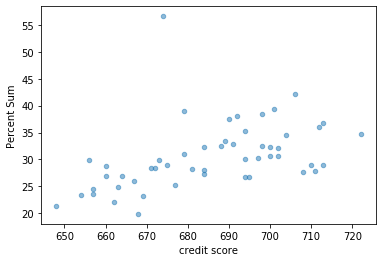

In [51]:
# save merged file as csv
new_merged.to_csv("Merged_Education_Attainment.csv", encoding="utf-8", index=False)

# scatter plot (test)
new_merged.plot(kind='scatter', x='credit score', y='Percent Sum', alpha=.50)
plt.show


<Figure size 1440x1280 with 0 Axes>

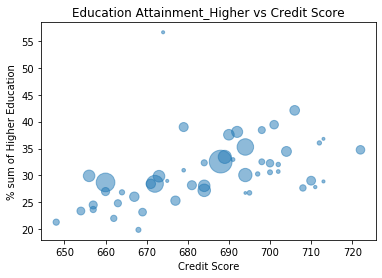

In [52]:
# adjust graph figure size
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

# Plot using variable marker by sample population per state
new_merged.plot(kind='scatter',x='credit score', y='Percent Sum', s=new_merged['Total']/50000, alpha=.5)
plt.xlabel('Credit Score')
plt.ylabel('% sum of Higher Education')
plt.title('Education Attainment_Higher vs Credit Score')
plt.show
plt.savefig('highereducation.png')

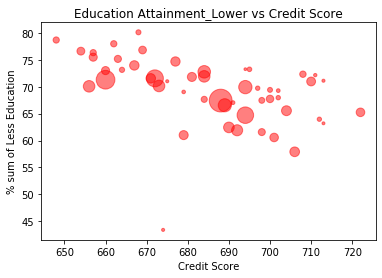

In [53]:
# Plot using variable marker by sample population per state
new_merged.plot(kind='scatter',x='credit score', y='Percent Sum less educated', color='r', s=new_merged['Total']/50000, alpha=.5)
plt.xlabel('Credit Score')
plt.ylabel('% sum of Less Education')
plt.title('Education Attainment_Lower vs Credit Score')
plt.show
plt.savefig('lowereducation.png')

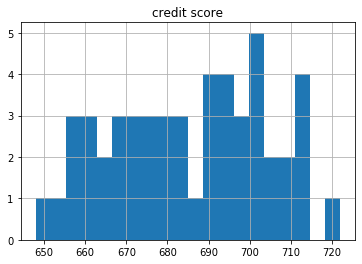

In [54]:
# create a histogram
new_merged.hist(column='credit score', bins = 20)
plt.savefig('histogram.png')

In [55]:
import matplotlib._color_data as mcd


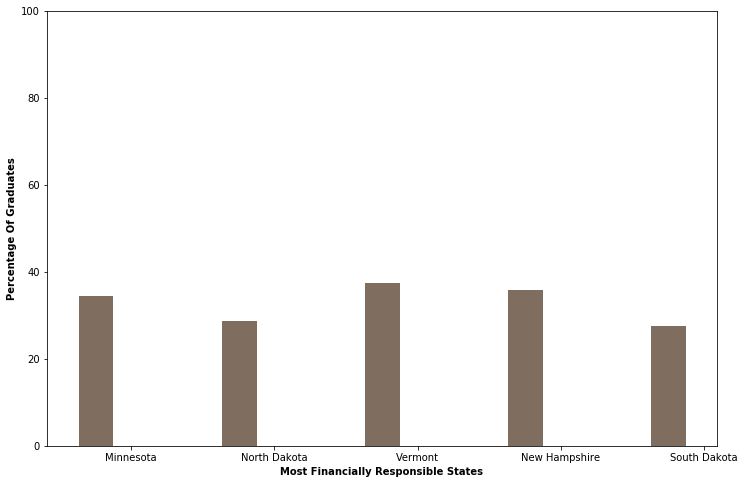

<Figure size 432x288 with 0 Axes>

In [56]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
fig, ax = plt.subplots(figsize=(12,8))
ax.set_ylim(0,100)
 
# set height of bar
bars1 = [34.76,28.89 , 37.56, 36.04, 27.85]

# Set position of bar on X axis
r1 = np.arange(len(bars1))

 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white',)
 
# Add xticks on the middle of the group bars
plt.xlabel('Most Financially Responsible States', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Minnesota', 'North Dakota', 'Vermont', 'New Hampshire', 'South Dakota'])
plt.ylabel('Percentage Of Graduates', fontweight='bold')
 
# Create legend & Show graphic

plt.show()
plt.savefig('beststate.png')


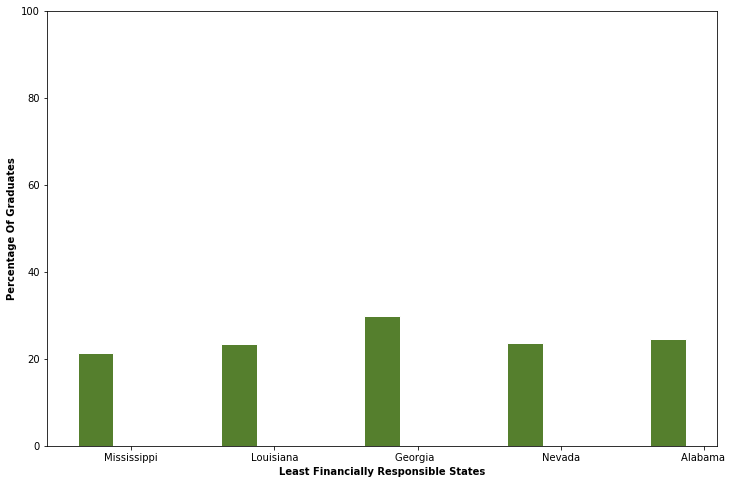

<Figure size 432x288 with 0 Axes>

In [57]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
fig, ax = plt.subplots(figsize=(12,8))
ax.set_ylim(0,100)
 
# set height of bar
bars1 = [21.33,23.40 , 29.93, 23.68, 24.52]

# Set position of bar on X axis
r1 = np.arange(len(bars1))

 
# Make the plot
plt.bar(r1, bars1, color='#557f2d', width=barWidth, edgecolor='white',)
 
# Add xticks on the middle of the group bars
plt.xlabel('Least Financially Responsible States', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Mississippi', 'Louisiana', 'Georgia  ', 'Nevada', 'Alabama '])
plt.ylabel('Percentage Of Graduates', fontweight='bold')
 
# Create legend & Show graphic

plt.show()
plt.savefig('1.png')

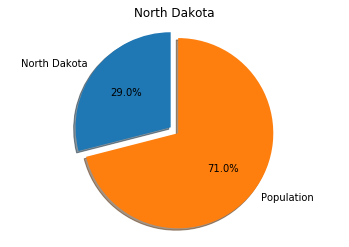

In [58]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'North Dakota','Population', 
sizes = [29, 71]
explode = (0, 0.1,)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("North Dakota")
plt.show()


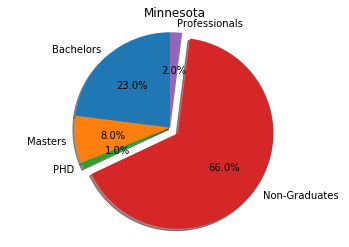

<Figure size 432x288 with 0 Axes>

In [59]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Bachelors','Masters', 'PHD','Non-Graduates','Professionals'
sizes = [23,8,1,66,2]
explode = (0, 0,0,0.1,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Minnesota")

plt.show()
plt.savefig('minnesota.png')

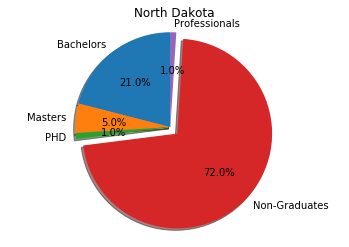

<Figure size 432x288 with 0 Axes>

In [60]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Bachelors','Masters', 'PHD','Non-Graduates','Professionals'
sizes = [21,5,1,72,1]
explode = (0, 0,0,0.1,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("North Dakota")

plt.show()
plt.savefig('northdakota.png')

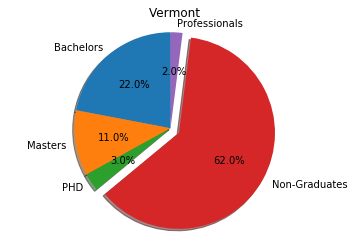

<Figure size 432x288 with 0 Axes>

In [61]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Bachelors','Masters', 'PHD','Non-Graduates','Professionals'
sizes = [22,11,3,62,2]
explode = (0, 0,0,0.1,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Vermont")

plt.show()
plt.savefig('vermont.png')

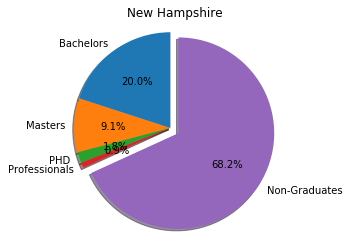

<Figure size 432x288 with 0 Axes>

In [62]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Bachelors','Masters', 'PHD','Professionals','Non-Graduates'
sizes = [22,10,2,1,75]
explode = (0, 0,0,0,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("New Hampshire")

plt.show()
plt.savefig('newhampshire.png')

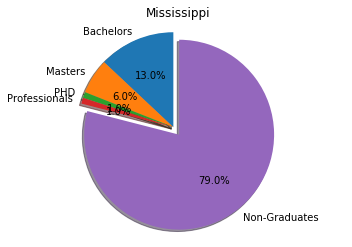

<Figure size 432x288 with 0 Axes>

In [63]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Bachelors','Masters', 'PHD','Professionals','Non-Graduates'
sizes = [13,6,1,1, 79]
explode = (0, 0,0,0,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Mississippi")

plt.show()
plt.savefig('mississippi.png')

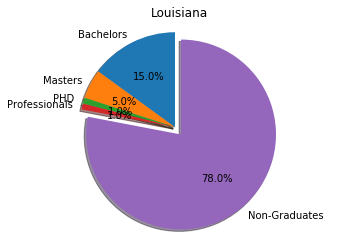

<Figure size 432x288 with 0 Axes>

In [64]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Bachelors','Masters', 'PHD','Professionals','Non-Graduates'
sizes = [15,5,1,1,78]
explode = (0, 0,0,0,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Louisiana")

plt.show()
plt.savefig('louisianna.png')

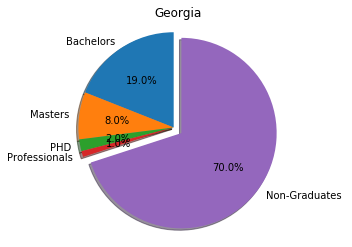

<Figure size 432x288 with 0 Axes>

In [65]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Bachelors','Masters', 'PHD','Professionals','Non-Graduates'
sizes = [19,8,2,1,70]
explode = (0, 0,0,0,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Georgia")

plt.show()
plt.savefig('georgia.png')

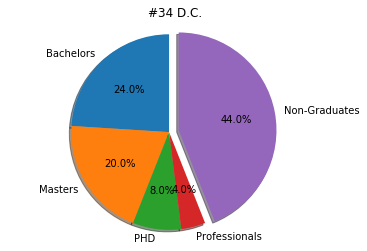

<Figure size 432x288 with 0 Axes>

In [66]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Bachelors','Masters', 'PHD','Professionals','Non-Graduates'
sizes = [24,20,8,4,44]
explode = (0, 0,0,0,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("#34 D.C.")

plt.show()
plt.savefig('dc.png')